In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

#### Let's load the Nashville zipcode data and look at the first few rows
- geopandas reads files with the `read_file()` method
- The zipcode data was downloaded from https://data.nashville.gov/General-Government/Zip-Codes/u7r5-bpku


In [2]:
zipcodes = gpd.read_file('../data/school_districts.geojson')
print(zipcodes.crs)
zipcodes.head( )

EPSG:4326


,first_name,city,zip,email,state,last_name,address,position,term_expir,district,phone,geometry
0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,"MULTIPOLYGON (((-86.77136 36.38357, -86.77134 ..."
1,Jill,Madison,37115,jill.speering@mnps.org,TN,Speering,1033 Falls Avenue,Vice-Chair,2016,3,615-562-5234,"MULTIPOLYGON (((-86.75365 36.40428, -86.75353 ..."
2,Dr. Jo Ann,Nashville,37220,joann.brannon@mnps.org,TN,Brannon,5444 San Marcos Drive,Member,2018,2,615-833-5976,"MULTIPOLYGON (((-86.76696 36.08333, -86.76590 ..."
3,Anna,Hermitage,37076,anna.shepherd@mnps.org,TN,Shepherd,4545 Raccoon Trail,Chair,2018,4,615-210-3768,"MULTIPOLYGON (((-86.58098 36.20935, -86.58099 ..."
4,Amy,Nashville,37221,amy.frogge@mnps.org,TN,Frogge,7237 Riverfront Drive,Member,2016,9,615-521-5650,"MULTIPOLYGON (((-86.97287 36.20828, -86.97045 ..."


In [3]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

#### Now let's look at the difference between calling the first geometry variable.....


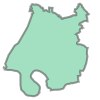

In [4]:
zipcodes.loc[0, 'geometry']

#### ...and printing it


In [5]:
print(zipcodes.loc[0, 'geometry'])

MULTIPOLYGON (((-86.77136400034288 36.38356699971902, -86.77134100031962 36.38342900001451, -86.77119900020405 36.3833800001776, -86.77108800026653 36.38327399984004, -86.77090400021756 36.38312799981859, -86.77064599977848 36.38298500014298, -86.7701839997801 36.382848999738385, -86.77002699987572 36.382781999976864, -86.76990600024777 36.38268600019161, -86.76926399971099 36.3818779999612, -86.76923700001166 36.38184299990573, -86.76910199989562 36.38175699998492, -86.76896799973603 36.38174700005654, -86.7685919999225 36.381815000168885, -86.76844400019482 36.38179400027582, -86.7683229999588 36.381696999720106, -86.7683080000176 36.38161000016036, -86.76772699983137 36.37987300011195, -86.76755800000984 36.37931199982026, -86.76736700019987 36.37880099997467, -86.76723399996457 36.37853000023175, -86.76682000025855 36.37778500000968, -86.76666699969871 36.37753800024863, -86.76636800017074 36.37713699998446, -86.76583400016119 36.37634999996508, -86.76513299988349 36.37557800018347

#### Plotting a GeoDataFrame is as easy as calling the GeoPandas .plot() function


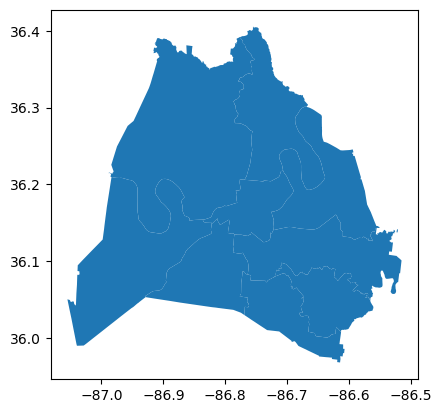

In [6]:
zipcodes.plot();

#### Add information and styling 
- set the `column =` to a column in the GeoDataFrame to color by
- change the [colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) 
- pass in keywords to tweak the legend created by [`matplotib`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)


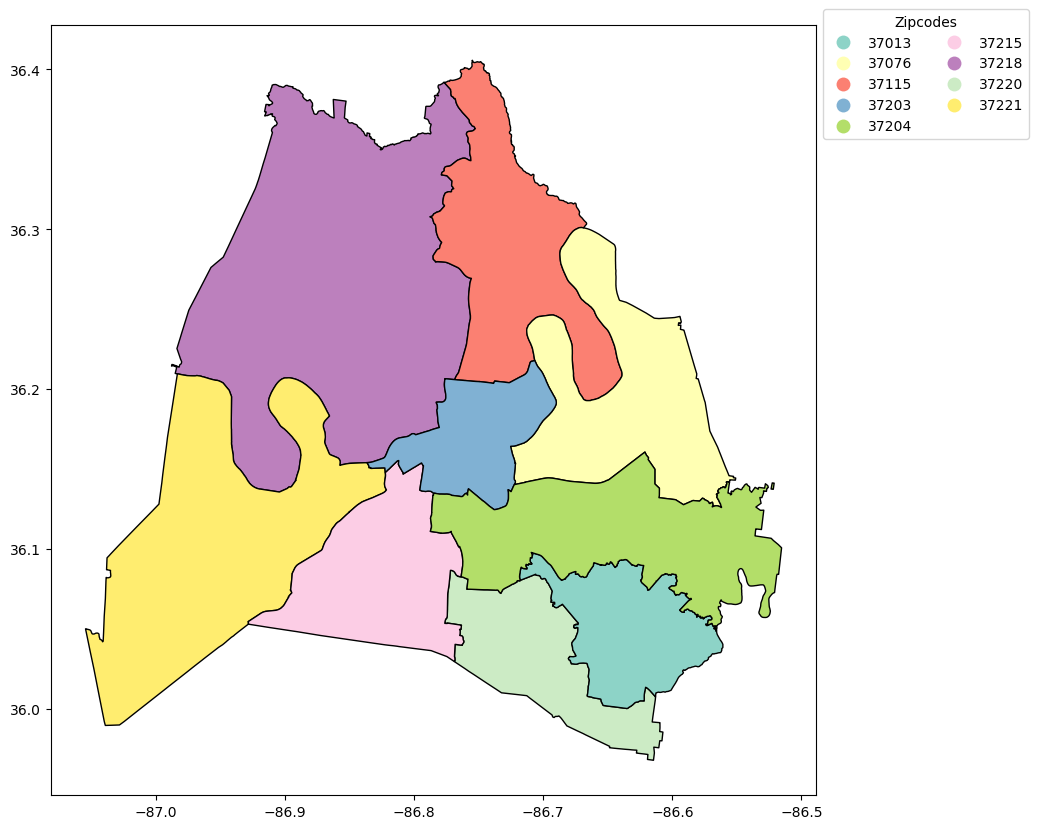

In [7]:
#geopandas will take care of legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set3')
plt.show()

#### Next you will read in the bus stop data
- downloaded from https://data.nashville.gov/Transportation/Regional-Transportation-Authority-Bus-Stops/p886-fnbd
- cleaned:
    - rename columns 
    - drop unwanted columns 
    - parse `lat` and `lng` columns from `location`
- print the shape 
- take a look at the first 3 rows

In [8]:
wifi = pd.read_csv('../data/cleanedwifi.csv')
del wifi['zip']
wifi.head(3)

,site,type,location,lat,lng
0,Andrew Jackson Courts,Public Gathering,"(36.1672892756157,-86.8011504244007)",36.167289,-86.801150
1,Antioch Community Center,Regional Community Center,"(36.055690857724,-86.6729587697093)",36.055691,-86.672959
2,Azafran Park,Public Gathering,"(36.1272157229559,-86.7537114125363)",36.127216,-86.753711


In [9]:
wifi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   site      103 non-null    object 
 1   type      103 non-null    object 
 2   location  103 non-null    object 
 3   lat       103 non-null    float64
 4   lng       103 non-null    float64
dtypes: float64(2), object(3)
memory usage: 4.1+ KB


- you want the CRS for the bus stops to match the CRS in the zipcodes GeoDataFrame 


In [10]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### The `GeoDataFrame()` constructor needs 3 parameters:
 - a DataFrame
 - a coordinate reference system
 - a geometry (we will use the geopandas `points_from_xy()` method to create a Point geometry)

In [11]:
wifi_geo = gpd.GeoDataFrame(wifi, 
                           crs = zipcodes.crs, 
                           geometry = gpd.points_from_xy(wifi.lng, wifi.lat))

In [12]:
type(wifi_geo)

geopandas.geodataframe.GeoDataFrame

#### Now you are ready to combine bus stops and zipcodes with a spatial join
- first a little clean up for the zipcodes
    - just keep the zip, po_name, and geometry columns
- then construct the join 
    - keep in mind that you want to find the **bus stops within a zip code polygon**
    - the geometry for the new (combined) GeoDataFrame comes from the left GeoDataFrame


In [13]:
zipcodes = zipcodes[['zip', 'district', 'geometry']]

In [14]:
wifi_by_zip = gpd.sjoin(wifi_geo, zipcodes, predicate = 'within')

In [15]:
wifi_by_zip.head()

,site,type,location,lat,lng,geometry,index_right,zip,district
0,Andrew Jackson Courts,Public Gathering,"(36.1672892756157,-86.8011504244007)",36.167289,-86.801150,POINT (-86.80115 36.16729),6,37203,5
1,Antioch Community Center,Regional Community Center,"(36.055690857724,-86.6729587697093)",36.055691,-86.672959,POINT (-86.67296 36.05569),7,37013,6
2,Azafran Park,Public Gathering,"(36.1272157229559,-86.7537114125363)",36.127216,-86.753711,POINT (-86.75371 36.12722),8,37204,7
3,Bellevue Community Center,Regional Community Center,"(36.0724468437892,-86.9337010534033)",36.072447,-86.933701,POINT (-86.93370 36.07245),4,37221,9
4,Beaman Nature Center,Regional Community Center,"(36.2725692488121,-86.9047669601709)",36.272569,-86.904767,POINT (-86.90477 36.27257),0,37218,1


#### Now that the data is joined spatially you can count the bus stops by zip code  and see how many stops are within each polygon 
- using the `value_counts()` method


In [16]:
wifi_by_zip['zip'].value_counts()

zip
37203    43
37218    19
37204     8
37215     8
37076     8
37115     7
37221     5
37013     4
37220     1
Name: count, dtype: int64

#### Let's take a closer look at the 272 bus stops in the 37207 zip code
- filter the stops_by_zip data to just get bus stops in 37207
- filter the zip code geodataframe to just the polygon (row) for 37207


In [17]:
wifi_in_37203 = wifi_by_zip.loc[wifi_by_zip['zip'] == '37203']
wifi_in_37203.shape

(43, 9)

In [18]:
polygon37203 = zipcodes.loc[zipcodes['zip'] == '37203']
polygon37203.shape

(1, 3)

#### Now plot these two together
- first plot the polygons for 37207 and make them light green
- next plot the points for the bus stops and color them by route

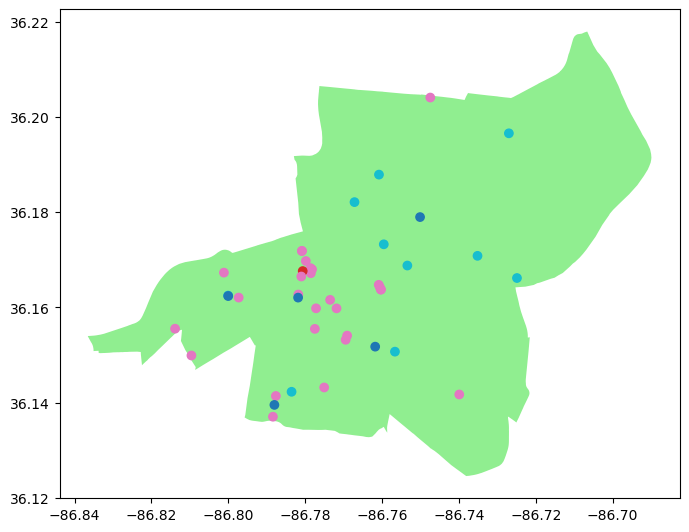

In [19]:
#fig, ax = matplotlib.subplots()
ax = polygon37203.plot(figsize = (8, 10), color = 'lightgreen')
wifi_in_37203.plot( ax = ax, column = 'type');
plt.show();

#### We're getting there! It would be helpful to have streets, though wouldn't it? We can add a street map with the folium package.

#### folium maps require a center point for the street map. 
- Make use of a GeoSeries attribute (.centroid) which gives the center of a polygon
- Since there are two polygons which should we use?

In [20]:
polygon37203.geometry.centroid

C:\Users\alaur\AppData\Local\Temp\ipykernel_43504\651956959.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37203.geometry.centroid


6    POINT (-86.75215 36.16995)
dtype: geometry

In [21]:
#find the center of the larger (more southern) polygon and look at it
center = polygon37203.geometry.centroid[6]
print(center)

POINT (-86.75214735715096 36.16995457037151)


C:\Users\alaur\AppData\Local\Temp\ipykernel_43504\915623472.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37203.geometry.centroid[6]


#### Folium requires a location point as an array 
- with *latitude* first
- but shapely Points have *longitude* first 

In [22]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.16995457037151, -86.75214735715096]


#### To create a folium map just call the folium `Map()` constructor
- `location` is the only argument required by the constructor
    - Set `area_center` as the `location` of the folium map. 
- `zoom_start` is an optional argument 
    - A setting of 12 should get us nice and close

In [23]:
#create our map of Nashville Zip Code 37207 and show it
map_37203 = folium.Map(location =  area_center, zoom_start = 12)
map_37203

#### Next, let's add our 37207 polygon and bus stop markers.

#### `itterows()` is a generator that iterates through the rows of a DataFrame and returns a tuple with the row id and row values. 
- Below, we are printing the row values for the first 3 row as we iterate through the GeoDataFrame of bus stops in 37207. 
- This idea will be helpful for creating our markers!

In [24]:
i = 0
for row_index, row_values in wifi_in_37203.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 0
values are:
 
site                          Andrew Jackson Courts
type                               Public Gathering
location       (36.1672892756157,-86.8011504244007)
lat                                       36.167289
lng                                       -86.80115
geometry           POINT (-86.80115042 36.16728928)
index_right                                       6
zip                                           37203
district                                          5
Name: 0, dtype: object
------------------------- 
index is 8
values are:
 
site                          Centennial Sportsplex
type                               Public Gathering
location       (36.1498811032316,-86.8096027536871)
lat                                       36.149881
lng                                      -86.809603
geometry            POINT (-86.80960275 36.1498811)
index_right                                       6
zip                                           37203
district        

#### Create map_37207 again with additional features:
- add the zipcode area outline (polygon_37207)
- iterate through the stops_in_37207 to
    - create location from each lat and lng
    - create a popup from the stop column
    - create a custom icon if you want with [font-awesome](https://fontawesome.com/v4.7.0/icons/)
    - build a marker from each location and popup and (optionally) your custom icon 
    - add the marker to  `map_37207`
- display `map_37207`

In [25]:
#draw our zip code area: 37207
map_37203 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37203).add_to(map_37203)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in wifi_in_37203.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['site'])
    icon=folium.Icon(color="orange",icon="wifi", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37203)
map_37203.save('../maps/map37203.html')

#display our map
map_37203

#### If you have a lot of markers, you might want to use marker clusters
- Folium has `MarkerCluster()` and `FastMarkerCluster()`
- Construct a `MarkerCluster()` 
    - construct a `MarkerCluster()` and `.add_to()` the map
    - when you loop through the data and create markers add those to the marker cluster
- Construct a `FastMarkerCluster()` by passing a list of locations

#### You can save your map as an html file and it will retain the interactive qualities

In [26]:
folium.Map?

Init signature:
folium.Map(
    location: Optional[Sequence[float]] = None,
    width: Union[str, float] = '100%',
    height: Union[str, float] = '100%',
    left: Union[str, float] = '0%',
    top: Union[str, float] = '0%',
    position: str = 'relative',
    tiles: Union[str, folium.raster_layers.TileLayer, NoneType] = 'OpenStreetMap',
    attr: Optional[str] = None,
    min_zoom: int = 0,
    max_zoom: int = 18,
    zoom_start: int = 10,
    min_lat: int = -90,
    max_lat: int = 90,
    min_lon: int = -180,
    max_lon: int = 180,
    max_bounds: bool = False,
    crs: str = 'EPSG3857',
    control_scale: bool = False,
    prefer_canvas: bool = False,
    no_touch: bool = False,
    disable_3d: bool = False,
    png_enabled: bool = False,
    zoom_control: bool = True,
    **kwargs: Union[str, float, bool, Sequence, dict, NoneType],
)
Docstring:     
Create a Map with Folium and Leaflet.js

Generate a base map of given width and height with either default
tilesets or a custom tile

In [44]:
cluster_map_37203 = folium.Map(location =  area_center, zoom_start = 12, tiles="Cartodb dark_matter")

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_37203)

folium.GeoJson(polygon37203).add_to(cluster_map_37203)

# inside the loop add each marker to the cluster
for row_index, row_values in wifi_in_37203.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['site'])
    icon=folium.Icon(color="cadetblue",icon="wifi", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_37203.save('../maps/cluster37203.html')

cluster_map_37203  

In [32]:
#draw our zip code area: 37207
map_37203 = folium.Map(location =  area_center, zoom_start = 12, tiles="Cartodb dark_matter")

folium.GeoJson(polygon37203).add_to(map_37203)

#create a list of locations and pass them to FastMarkerCluster()
locations = wifi_in_37203[['lat', 'lng']].values.tolist()
map_37203.add_child(
    FastMarkerCluster(locations)
)



#display our map
map_37203